In [29]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt

In [30]:
RESULTS = '../results/depth'

In [31]:
gemini = json.load(open(f'{RESULTS}/0_529_rebalanced_gemini.json'))

In [32]:
gemini[0]

{'image_1': 'obj_images/test/ladder/85.jpg',
 'image_2': 'obj_images/test/ladder/1079.jpg',
 'answer': 'Right',
 'question': 'Which ladder is closer to the camera?',
 'gemini_answer': ' First'}

In [8]:
gpt = json.load(open(f'{RESULTS}/0_529_rebalanced_gpt.json'))
gpt_decompose = json.load(open(f'{RESULTS}/0_529_gpt_rebalanced_decompose.json'))


In [10]:
gpt_decompose[0]

{'image_1': 'obj_images/test/ladder/85.jpg',
 'image_2': 'obj_images/test/ladder/1079.jpg',
 'answer': 'Right',
 'question': 'Which ladder is closer to the camera?',
 'gpt_decompose_answer': 'Left'}

In [7]:
llava = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_529_llava.jsonl'), "r")]

In [23]:
refine = []
rerun = []
error = []
for pair in gpt_decompose:
    new = deepcopy(pair)
    if pair['gpt_decompose_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['gpt_decompose_answer']:
        new['gpt_decompose_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['gpt_decompose_answer']:
        new['gpt_decompose_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

{'image_1': 'obj_images/test/microwave/', 'image_2': 'obj_images/test/microwave/571.jpg', 'answer': 'Left', 'question': 'Which microwave is closer to the camera?', 'gpt_decompose_answer': 'Error'}
{'image_1': 'obj_images/test/ottoman/433.jpg', 'image_2': 'obj_images/test/ottoman/', 'answer': 'Left', 'question': 'Which ottoman is closer to the camera?', 'gpt_decompose_answer': 'Error'}
{'image_1': 'obj_images/test/pillow/952.jpg', 'image_2': 'obj_images/test/pillow/1206.jpg', 'answer': 'Right', 'question': 'Which pillow is closer to the camera?', 'gpt_decompose_answer': 'Error'}
{'image_1': 'obj_images/test/chair/607.jpg', 'image_2': 'obj_images/test/chair/', 'answer': 'Left', 'question': 'Which chair is closer to the camera?', 'gpt_decompose_answer': 'Error'}
{'image_1': 'obj_images/test/electrical outlet/141.jpg', 'image_2': 'obj_images/test/electrical outlet/', 'answer': 'Left', 'question': 'Which electrical outlet is closer to the camera?', 'gpt_decompose_answer': 'Error'}
{'image_1

In [24]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gpt_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gpt_decompose_answer']:
            correct.append(pair)
            correct_pred.append(pair['gpt_decompose_answer'])
    elif pair['answer'] != pair['gpt_decompose_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gpt_decompose_answer'])
    else:
        print('fuck')

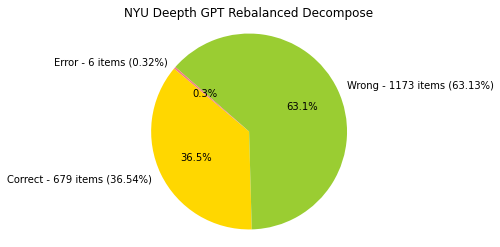

In [25]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NYU Deepth GPT Rebalanced Decompose')
plt.show()

# sanity check

In [20]:
refine = []
rerun = []
error = []
for pair in gpt:
    new = deepcopy(pair)
    if pair['gpt_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['gpt_answer']:
        new['gpt_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['gpt_answer']:
        new['gpt_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

{'image_1': 'obj_images/test/door/1267.jpg', 'image_2': 'obj_images/test/door/1306.jpg', 'answer': 'Right', 'question': 'Which door is closer to the camera?', 'gpt_answer': 'GPT error'}
{'image_1': 'obj_images/test/microwave/', 'image_2': 'obj_images/test/microwave/571.jpg', 'answer': 'Left', 'question': 'Which microwave is closer to the camera?', 'gpt_answer': 'wrong path'}
{'image_1': 'obj_images/test/picture/1255.jpg', 'image_2': 'obj_images/test/picture/1287.jpg', 'answer': 'Left', 'question': 'Which picture is closer to the camera?', 'gpt_answer': 'GPT error'}
{'image_1': 'obj_images/test/bed/524.jpg', 'image_2': 'obj_images/test/bed/993.jpg', 'answer': 'Left', 'question': 'Which bed is closer to the camera?', 'gpt_answer': 'GPT error'}
{'image_1': 'obj_images/test/cabinet/341.jpg', 'image_2': 'obj_images/test/cabinet/1260.jpg', 'answer': 'Left', 'question': 'Which cabinet is closer to the camera?', 'gpt_answer': 'GPT error'}
{'image_1': 'obj_images/test/ottoman/433.jpg', 'image_2

In [12]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gpt_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gpt_answer']:
            correct.append(pair)
            correct_pred.append(pair['gpt_answer'])
    elif pair['answer'] != pair['gpt_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gpt_answer'])
    else:
        print('fuck')

In [13]:
len(correct) / (len(correct) + len(wrong))

0.5637547476939773

In [8]:
Counter(wrong_pred+correct_pred)

Counter({'Left': 1489, 'Right': 354})

In [9]:
len(gpt)

1858

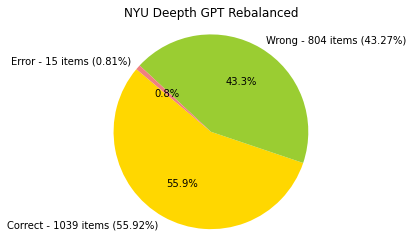

In [14]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NYU Deepth GPT Rebalanced')
plt.show()

# Geimini

In [41]:
gemini[0]

{'image_1': 'obj_images/test/bottle/1346.jpg',
 'image_2': 'obj_images/test/bottle/1345.jpg',
 'answer': 'Left',
 'question': 'Which bottle is closer to the camera?',
 'gemini_answer': ' First'}

In [13]:
error = []
refine = []
for pair in gemini:
    new = deepcopy(pair)
    if 'First' in pair['gemini_answer']:
        new['gemini_answer'] = 'Left'
        refine.append(new)
    elif 'Second' in pair['gemini_answer']:
        new['gemini_answer'] = 'Right'
        refine.append(new)
    else:
        
        #refine.append(pair)
        error.append(pair)
        print(pair)
        

{'image_1': 'obj_images/test/microwave/', 'image_2': 'obj_images/test/microwave/571.jpg', 'answer': 'Left', 'question': 'Which microwave is closer to the camera?', 'gemini_answer': 'wrong path'}
{'image_1': 'obj_images/test/knife rack/141.jpg', 'image_2': 'obj_images/test/knife rack/778.jpg', 'answer': 'Left', 'question': 'Which knife rack is closer to the camera?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'obj_images/test/knife/774.jpg', 'image_2': 'obj_images/test/knife/778.jpg', 'answer': 'Right', 'question': 'Which knife is closer to the camera?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'obj_images/test/knife rack/774.jpg', 'image_2': 'obj_images/test/knife rack/761.jpg', 'answer': 'Left', 'question': 'Which knife rack is closer to the camera?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'obj_images/test/knife rack/774.jpg', 'image_2': 'obj_images/test/knife rack/753.jpg', 'answer': 'Left', 'question': 'Which knife rack is closer to the camera?', 'gemini_answer': 'Gemini

In [14]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gemini_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gemini_answer']:
            correct.append(pair)
            correct_pred.append(pair['gemini_answer'])
    elif pair['answer'] != pair['gemini_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gemini_answer'])
    else:
        print('fuck')

In [44]:
Counter(correct_pred+wrong_pred)

Counter({'Left': 1324, 'Right': 490})

In [16]:
len(correct) / (len(correct) + len(wrong))

0.5594139989148128

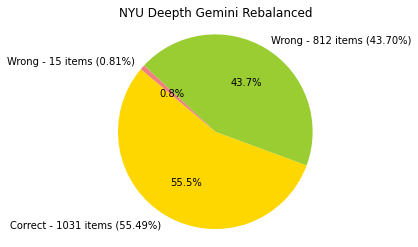

In [15]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Wrong - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NYU Deepth Gemini Rebalanced')
plt.show()

# LLaVA-1.6

In [8]:
error = []
refine = []
rerun = []
for pair in llava:
    new = deepcopy(pair)
    if pair['llava_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['llava_answer']:
        new['llava_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['llava_answer']:
        new['llava_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)

{'image_1': 'obj_images/test/microwave/', 'image_2': 'obj_images/test/microwave/571.jpg', 'answer': 'Left', 'question': 'Which microwave is closer to the camera?', 'llava_answer': 'wrong path'}
{'image_1': 'obj_images/test/electrical outlet/141.jpg', 'image_2': 'obj_images/test/electrical outlet/', 'answer': 'Left', 'question': 'Which electrical outlet is closer to the camera?', 'llava_answer': 'wrong path'}
{'image_1': 'obj_images/test/chair/607.jpg', 'image_2': 'obj_images/test/chair/', 'answer': 'Left', 'question': 'Which chair is closer to the camera?', 'llava_answer': 'wrong path'}
{'image_1': 'obj_images/test/container/318.jpg', 'image_2': 'obj_images/test/container/', 'answer': 'Left', 'question': 'Which container is closer to the camera?', 'llava_answer': 'wrong path'}
{'image_1': 'obj_images/test/ottoman/433.jpg', 'image_2': 'obj_images/test/ottoman/', 'answer': 'Left', 'question': 'Which ottoman is closer to the camera?', 'llava_answer': 'wrong path'}


In [9]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['llava_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['llava_answer']:
            correct.append(pair)
            correct_pred.append(pair['llava_answer'])
    elif pair['answer'] != pair['llava_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['llava_answer'])
    else:
        print('fuck')

In [10]:
len(correct) / (len(correct) + len(wrong))

0.6326860841423948

In [11]:
Counter(wrong_pred+correct_pred)

Counter({'Left': 958, 'Right': 896})

In [12]:
len(llava)

1859

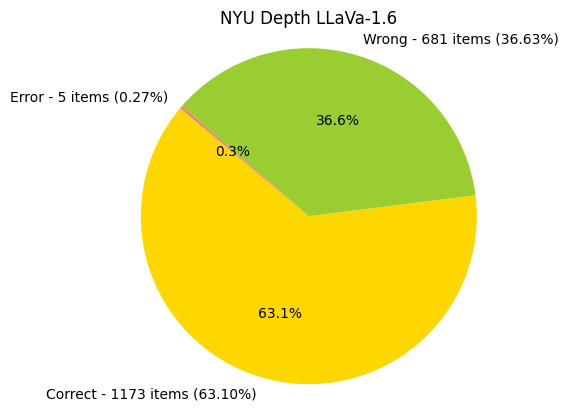

In [13]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NYU Depth LLaVa-1.6')
plt.show()